# **Курсовой проект на тему: Анализ маршрутов полетов авиакомпаний в США за 1993-2024 год**

**Выполнил: Студент группы ИД22-1 Енин Кирилл Александрович**

# **1. Сбор информации**

**1.1 Импортирование файла**

In [4]:
import pandas as pd

# Importing CSV file

df = pd.read_csv('C:/Users/kiril/OneDrive/Desktop/US Airline Flight Routes and Fares 1993-2024.csv', low_memory=False)

**1.21 Проверка типов данных**

In [5]:
data_types = df.dtypes
print(data_types)

tbl                object
Year                int64
quarter             int64
citymarketid_1      int64
citymarketid_2      int64
city1              object
city2              object
airportid_1         int64
airportid_2         int64
airport_1          object
airport_2          object
nsmiles             int64
passengers          int64
fare              float64
carrier_lg         object
large_ms          float64
fare_lg           float64
carrier_low        object
lf_ms             float64
fare_low          float64
Geocoded_City1     object
Geocoded_City2     object
tbl1apk            object
dtype: object


**1.22 Проверка на дубликаты**

In [6]:
duplicates = df.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


# **2. Просмотр данных**

**2.1 Ознакомление со структурой данных**

**2.11 Просмотр первых 5 рядов из датасета**

In [7]:
df.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


**2.12 Просмотр информации датафрейма**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

**2.13 Общая статистика**

In [9]:
df.describe()

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,244415.000000,244415.000000,244343.000000,244343.000000
mean,2008.524124,2.479153,31556.430201,32180.117086,12437.099986,13249.889525,1189.812319,299.476795,218.979587,0.665252,218.710963,0.450438,190.675939
std,8.703364,1.122149,1089.872880,1232.464184,1431.665257,1425.810159,703.143472,511.389486,82.372486,0.224635,84.674363,0.332669,73.577694
min,1993.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,109.000000,0.000000,50.000000,0.003800,50.000000,0.010000,50.000000
25%,2001.000000,1.000000,30721.000000,30994.000000,11193.000000,12197.000000,626.000000,21.000000,164.620000,0.480000,161.500000,0.158000,140.060000
50%,2008.000000,2.000000,31423.000000,32211.000000,12266.000000,13303.000000,1023.000000,113.000000,209.320000,0.652400,208.030000,0.360000,181.630000
75%,2016.000000,3.000000,32467.000000,33192.000000,13487.000000,14679.000000,1736.000000,339.000000,262.890000,0.871900,263.640000,0.750000,230.040000
max,2024.000000,4.000000,35412.000000,35628.000000,16440.000000,15919.000000,2724.000000,8301.000000,3377.000000,1.000000,2725.600000,1.000000,2725.600000


**2.14 Просмотр названия столбцов**

In [10]:
df.columns

Index(['tbl', 'Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1',
       'city2', 'airportid_1', 'airportid_2', 'airport_1', 'airport_2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'Geocoded_City1', 'Geocoded_City2',
       'tbl1apk'],
      dtype='object')

**2.15 Шейп данных**

In [11]:
df.shape

(245955, 23)

**2.16 Просмотр случайных 5 рядов датасета**

In [31]:
df.sample(5)

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
148224,Table 1a,2006,3,33198,32575,"Kansas City, MO","Los Angeles, CA (Metropolitan Area)",13198,12954,MCI,...,267.33,HP,0.66,253.55,HP,0.66,253.55,"Kansas City, MO\n(39.099792, -94.578559)","Los Angeles, CA (Metropolitan Area)\n(34.05223...",200631319812954MCILGB
114570,Table 1a,2012,1,31057,32575,"Charlotte, NC","Los Angeles, CA (Metropolitan Area)",11057,10800,CLT,...,336.29,US,0.72,338.82,UA,0.07,308.18,"Charlotte, NC\n(35.222936, -80.840161)","Los Angeles, CA (Metropolitan Area)\n(34.05223...",201211105710800CLTBUR
178212,Table 1a,2001,3,34492,30852,"Raleigh/Durham, NC","Washington, DC (Metropolitan Area)",14492,12264,RDU,...,117.29,JI,0.78,114.91,JI,0.78,114.91,"Raleigh/Durham, NC\n(42.673348, -72.179683)","Washington, DC (Metropolitan Area)\n(38.892062...",200131449212264RDUIAD
11122,Table 1a,2010,3,30693,32457,"Nashville, TN","San Francisco, CA (Metropolitan Area)",10693,13796,BNA,...,236.53,WN,0.95,233.43,WN,0.95,233.43,"Nashville, TN\n(36.166687, -86.779932)","San Francisco, CA (Metropolitan Area)\n(37.780...",201031069313796BNAOAK
49233,Table 1a,1998,1,32575,31703,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",12892,13784,LAX,...,422.25,TW,0.50,409.70,TW,0.50,409.70,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",199811289213784LAXNYC


**2.2 Отсутствующие значения**

**2.21 Поиск отсутствующих значений**

In [13]:
missing_values = df.isnull().sum()
missing_values

tbl                   0
Year                  0
quarter               0
citymarketid_1        0
citymarketid_2        0
city1                 0
city2                 0
airportid_1           0
airportid_2           0
airport_1             0
airport_2             0
nsmiles               0
passengers            0
fare                  0
carrier_lg         1540
large_ms           1540
fare_lg            1540
carrier_low        1612
lf_ms              1612
fare_low           1612
Geocoded_City1    39206
Geocoded_City2    39206
tbl1apk               0
dtype: int64

**2.22 Визуализация отсутствующих значений**

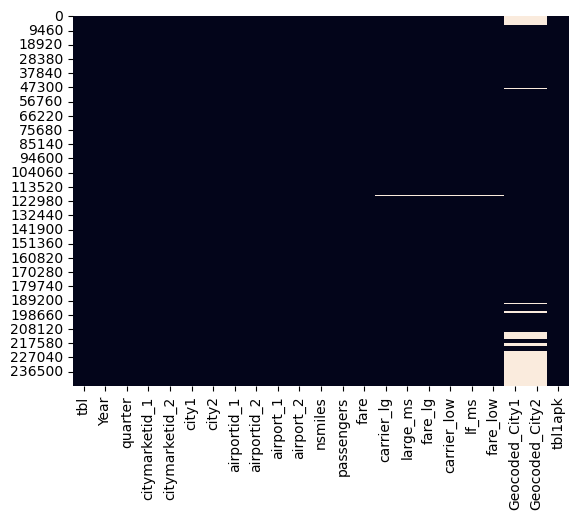

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Визуализация missing значений с помощью тепловой карты
sns.heatmap(df.isnull(), cbar=False)
plt.show()

**2.23 Удаление рядов и колонок, не имеющих значения**

In [15]:
# Удаление рядов с missing значениями
df_cleaned = df.dropna()

# Удаление колонн с missing значениями
df_cleaned_columns = df.dropna(axis=1)

print(df_cleaned.shape)
print(df_cleaned_columns.shape)

(205189, 23)
(245955, 15)


# **3. Чистка данных**

**3.1 Идентификация выбросов с использованием Z-оценки**

In [16]:
from scipy import stats

# Вычисление Z-оценки для каждого значения в датафрейме
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Идентифицирование выбросы (Z-оценка > 3 или < -3)
df_outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]
print(df_outliers.shape)

(9806, 23)


**3.2 Удаление выбросов**

In [17]:
# Remove rows with outliers based on Z-score
df_no_outliers = df[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]
df_no_outliers.shape

(0, 23)

# **Начало анализа**

**Как распределены тариф и количество миль?**

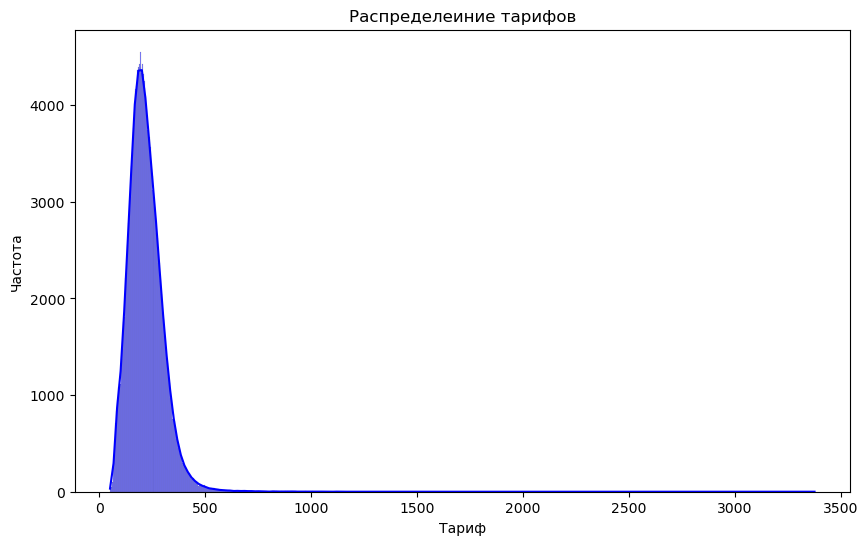

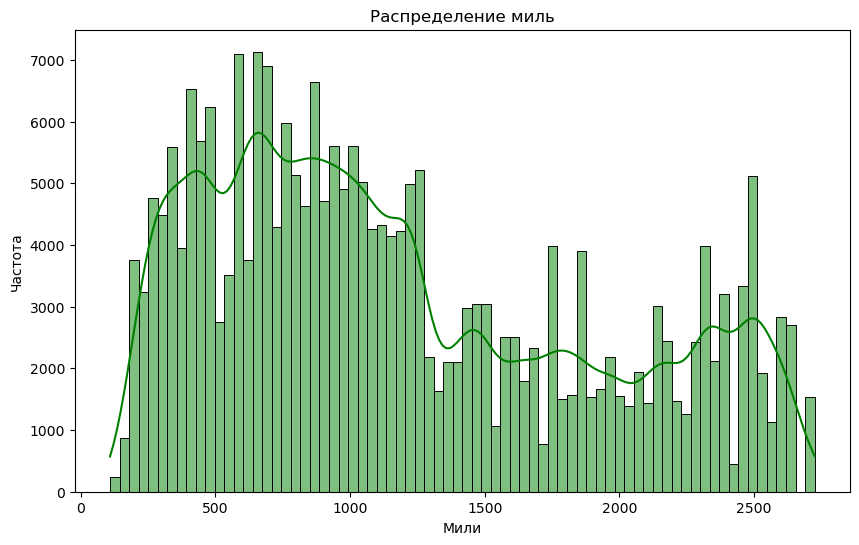

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Распределение тарифов
plt.figure(figsize=(10, 6))
sns.histplot(df['fare'], kde=True, color='blue')
plt.title('Распределеиние тарифов')
plt.xlabel('Тариф')
plt.ylabel('Частота')
plt.show()

# Распределение количетсва миль
plt.figure(figsize=(10, 6))
sns.histplot(df['nsmiles'], kde=True, color='green')
plt.title('Распределение миль')
plt.xlabel('Мили')
plt.ylabel('Частота')
plt.show()

**Какова связь между тарифом и количеством миль?**

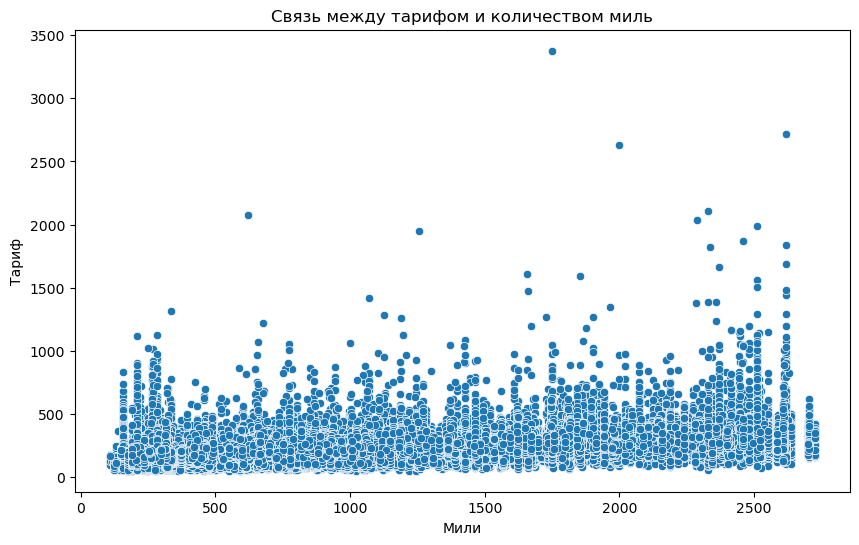

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nsmiles', y='fare', data=df)
plt.title('Связь между тарифом и количеством миль')
plt.xlabel('Мили')
plt.ylabel('Тариф')
plt.show()

**Каков средний тариф по годам?**

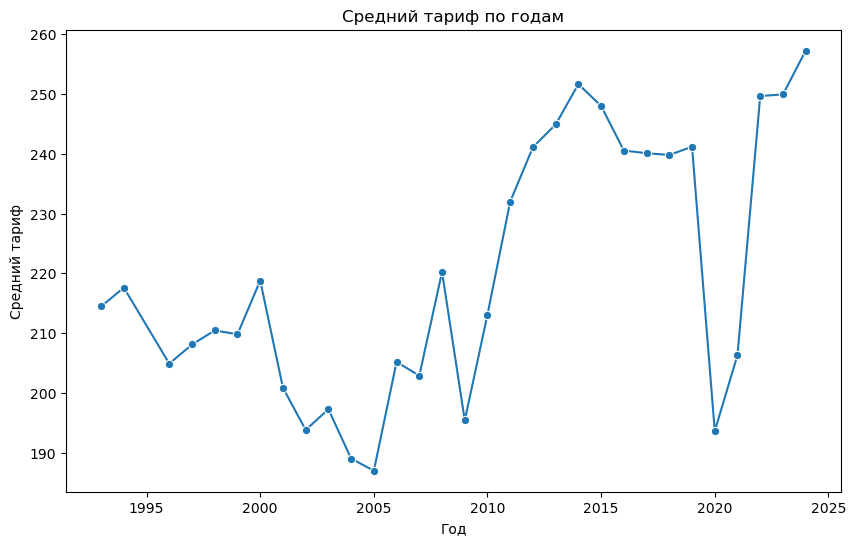

In [34]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='fare', data=df.groupby('Year')['fare'].mean().reset_index(), marker='o')
plt.title('Средний тариф по годам')
plt.xlabel('Год')
plt.ylabel('Средний тариф')
plt.show()

**Как изменяется количество пассажиров в разных городах (city1)?**

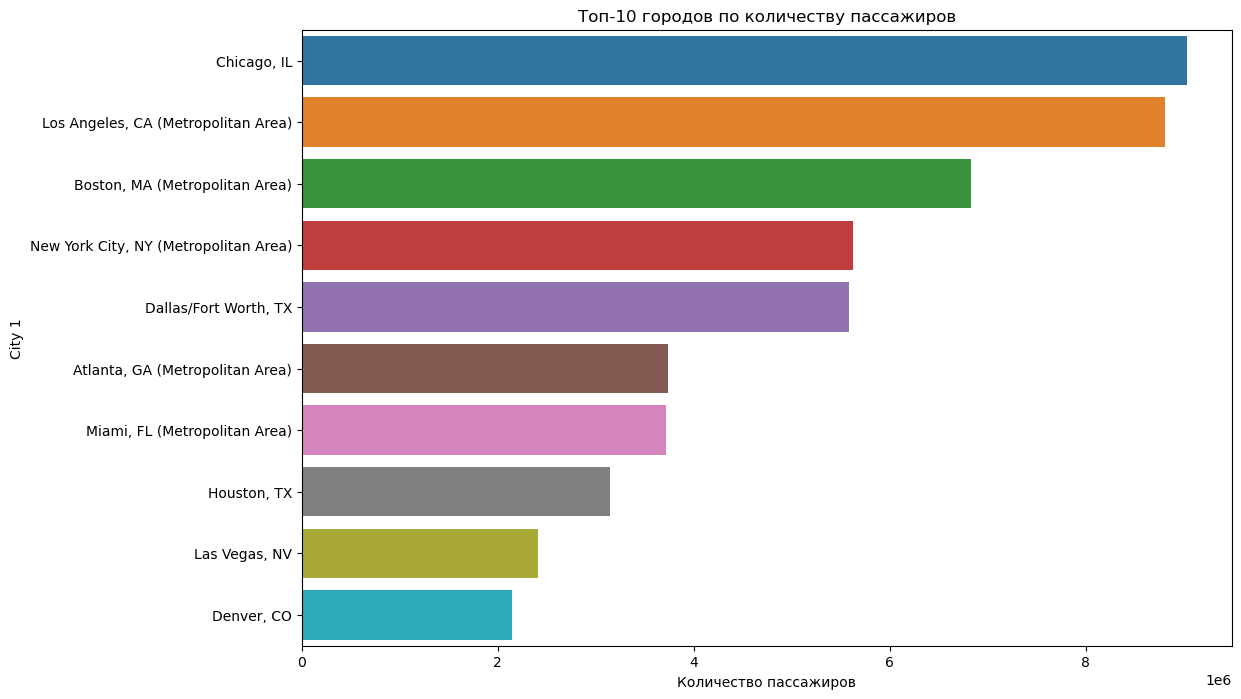

In [35]:
plt.figure(figsize=(12, 8))
top_cities = df.groupby('city1')['passengers'].sum().nlargest(10).reset_index()
sns.barplot(x='passengers', y='city1', data=top_cities)
plt.title('Топ-10 городов по количеству пассажиров')
plt.xlabel('Количество пассажиров')
plt.ylabel('City 1')
plt.show()

**Каково распределение рыночных долей carrier_lg и carrier_low?**

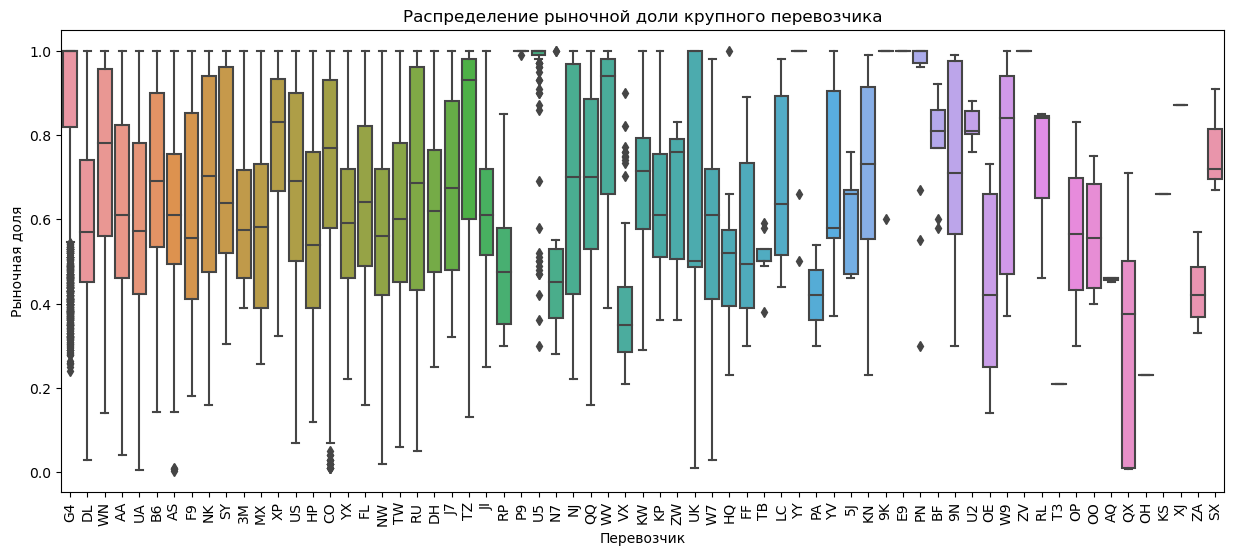

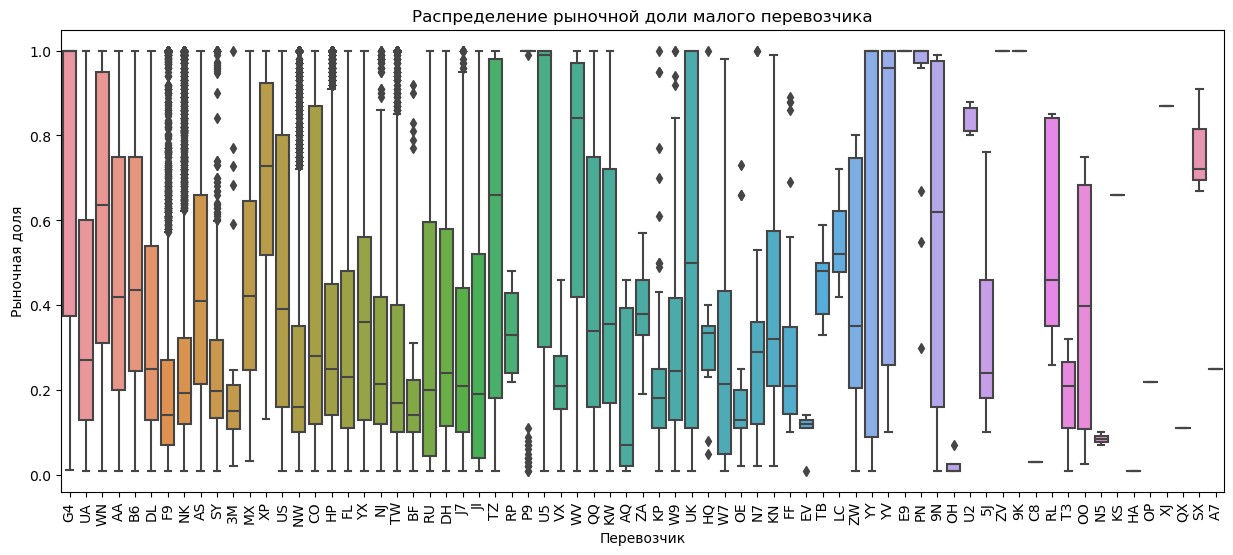

In [48]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='carrier_lg', y='large_ms', data=df)
plt.title('Распределение рыночной доли крупного перевозчика')
plt.xlabel('Перевозчик')
plt.xticks(rotation=90)
plt.ylabel('Рыночная доля')
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x='carrier_low', y='lf_ms', data=df)
plt.title('Распределение рыночной доли малого перевозчика')
plt.xlabel('Перевозчик')
plt.xticks(rotation=90)
plt.ylabel('Рыночная доля')
plt.show()

**Какие пары аэропортов airport_1 и airport_2 встречаются чаще всего?**

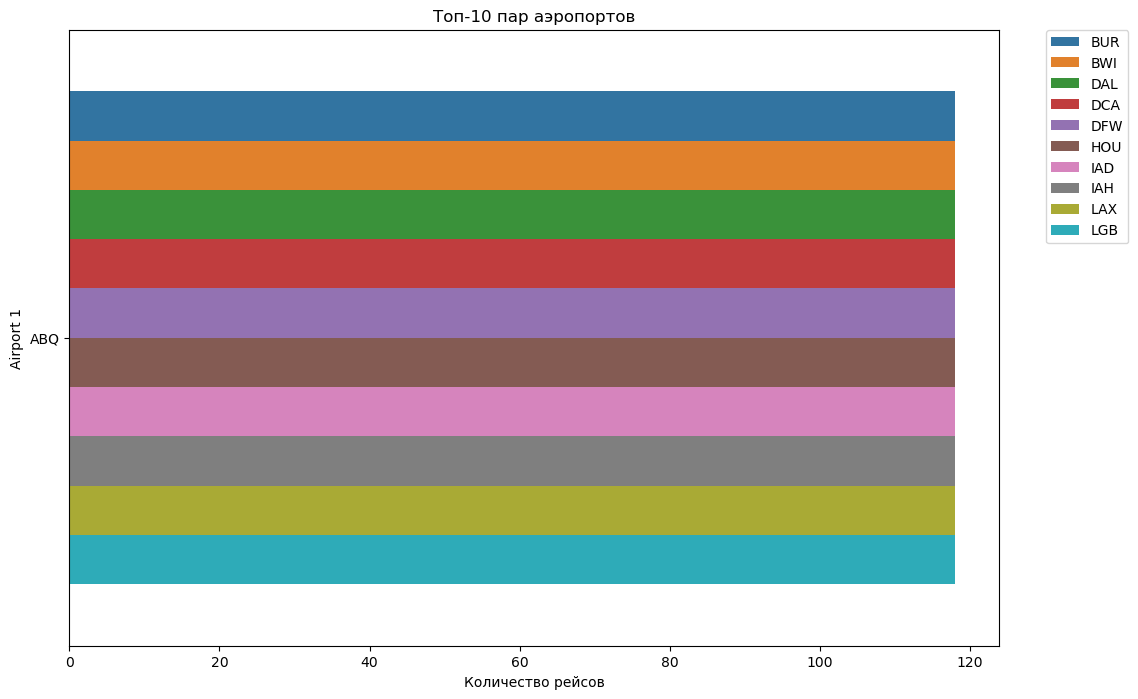

In [49]:
airport_pairs = df.groupby(['airport_1', 'airport_2']).size().nlargest(10).reset_index(name='count')
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='airport_1', hue='airport_2', data=airport_pairs)
plt.title('Топ-10 пар аэропортов')
plt.xlabel('Количество рейсов')
plt.ylabel('Airport 1')
# Передвижение легенды карты вправо
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

**Какие комбинации городов city1 и city2 имеют самый высокий средний тариф?**

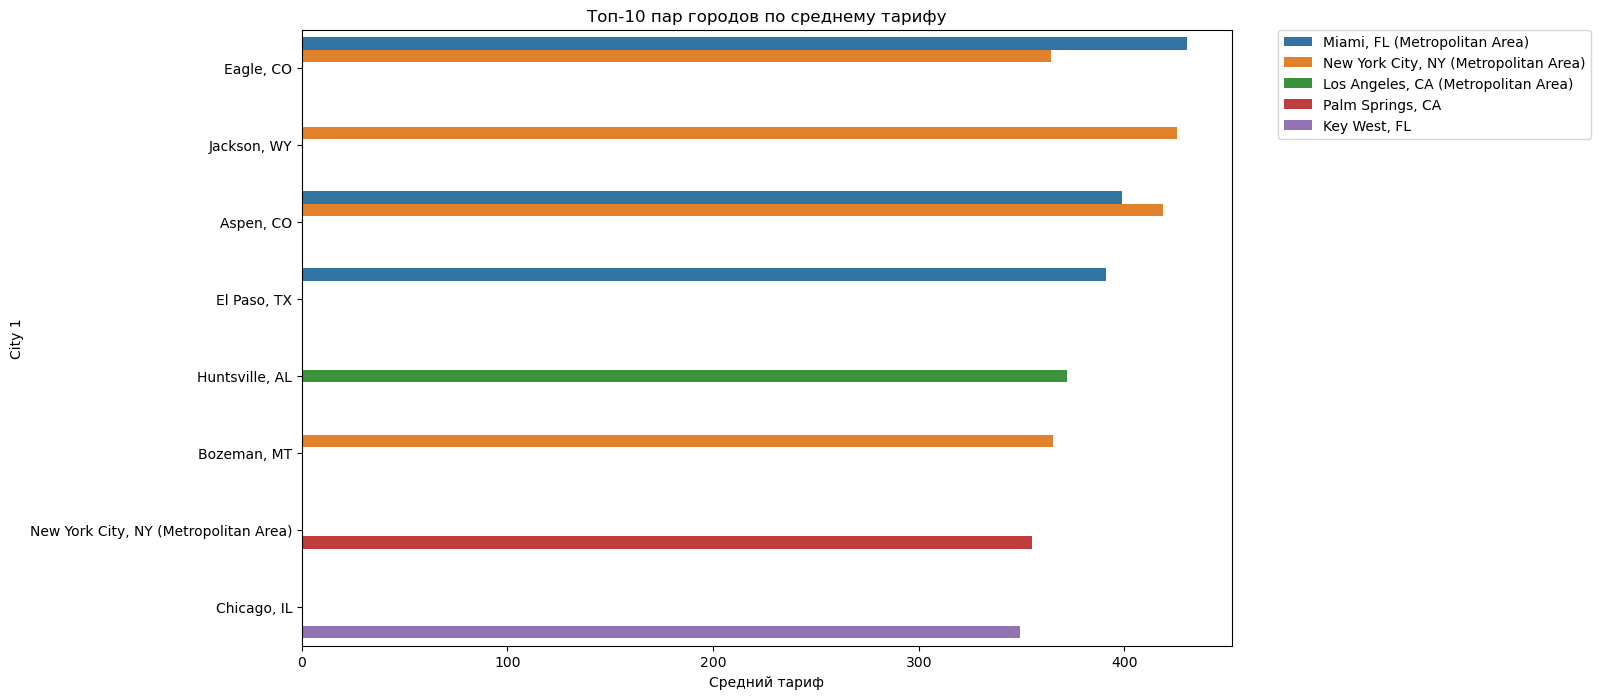

In [50]:
# Вычисление среднего тарифа для каждой пары городов
city_pairs_fare = df.groupby(['city1', 'city2'])['fare'].mean().reset_index()

# Сортировка по самому высокому среднему тарифу и выбор топ-10
top_city_pairs_fare = city_pairs_fare.nlargest(10, 'fare')

plt.figure(figsize=(12, 8))
sns.barplot(x='fare', y='city1', hue='city2', data=top_city_pairs_fare)
plt.title('Топ-10 пар городов по среднему тарифу')
plt.xlabel('Средний тариф')
plt.ylabel('City 1')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

**Как изменяется количество пассажиров по кварталам и годам?**

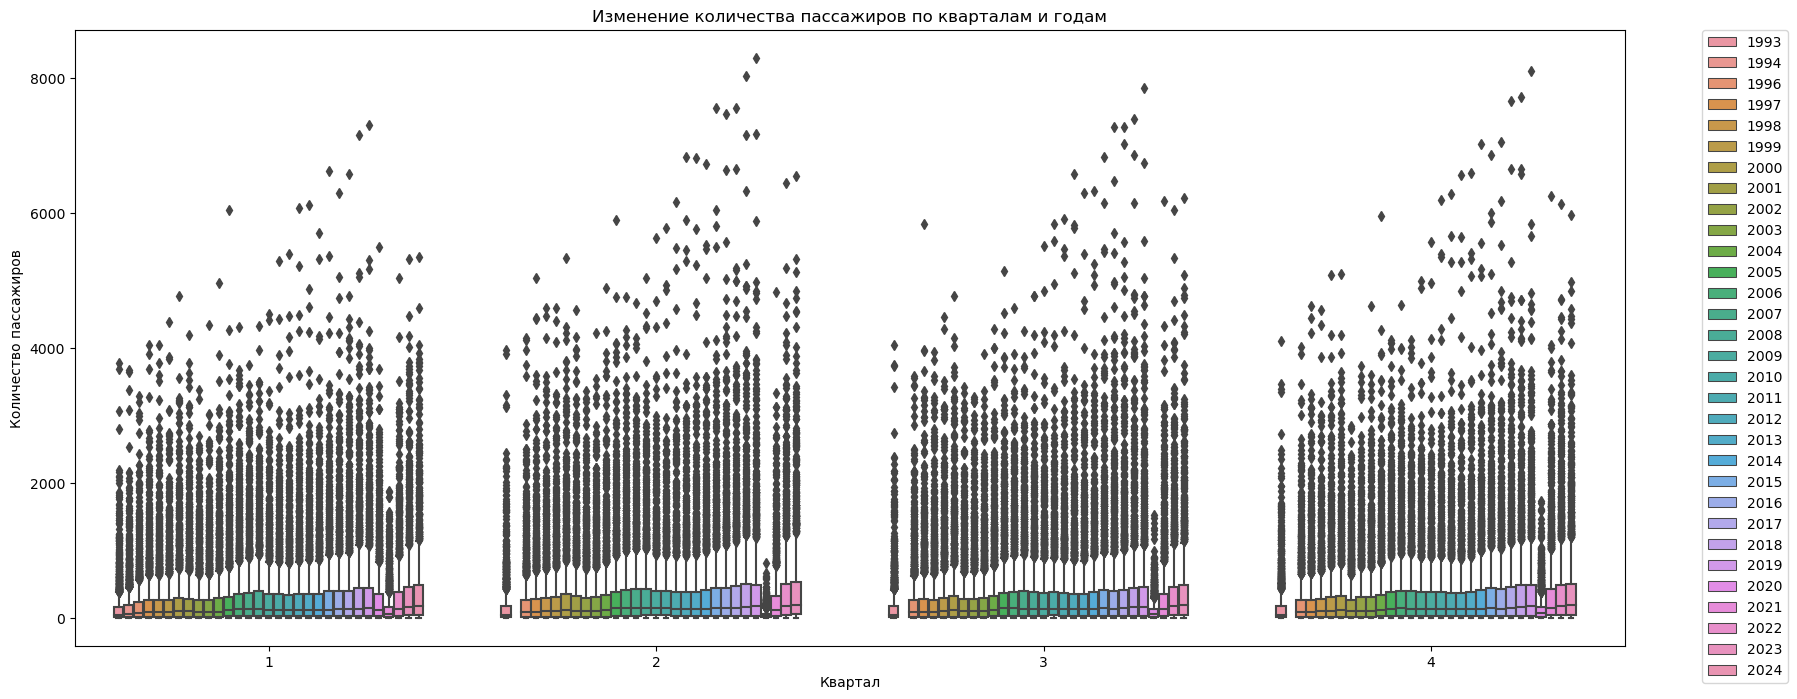

In [51]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='quarter', y='passengers', hue='Year', data=df)
plt.title('Изменение количества пассажиров по кварталам и годам')
plt.xlabel('Квартал')
plt.ylabel('Количество пассажиров')
plt.legend(title='Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

**Какие аэропорты самые загруженные по количеству пассажиров?**

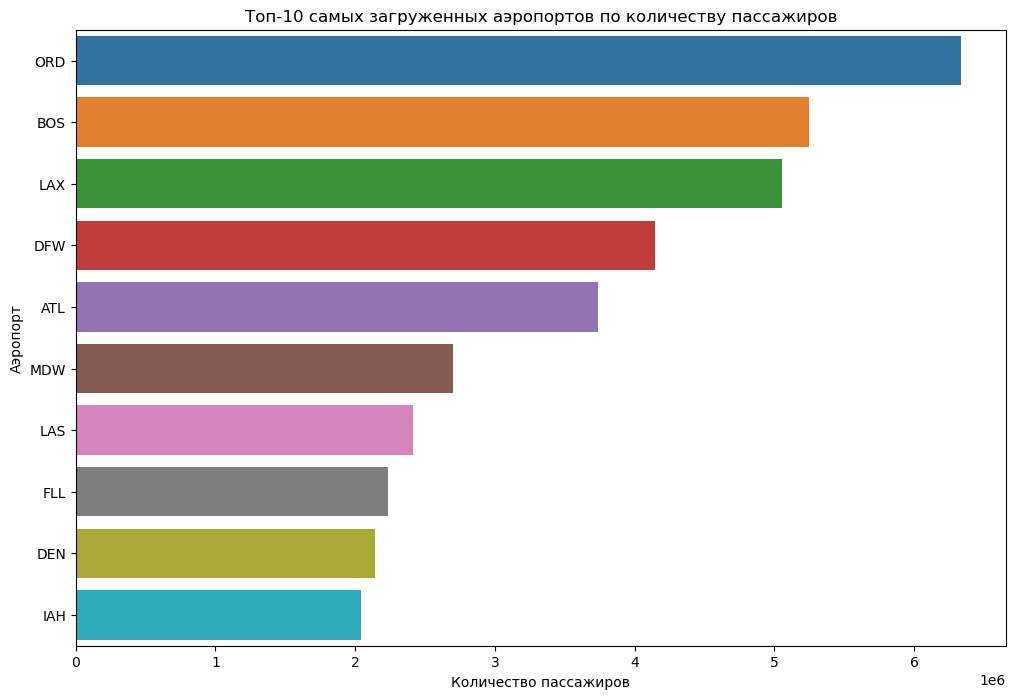

In [52]:
# Группировка по airport_1 и airport_2 отдельно и суммирование количества пассажиров
airport1_passengers = df.groupby('airport_1')['passengers'].sum().reset_index()
airport2_passengers = df.groupby('airport_2')['passengers'].sum().reset_index()

# Объединение результатов
busiest_airports = pd.concat([airport1_passengers, airport2_passengers], ignore_index=True)
busiest_airports = busiest_airports.groupby('airport_1')['passengers'].sum().reset_index()

# Топ-10 самых загруженных аэропортов
top_airports = busiest_airports.nlargest(10, 'passengers')

plt.figure(figsize=(12, 8))
sns.barplot(x='passengers', y='airport_1', data=top_airports)
plt.title('Топ-10 самых загруженных аэропортов по количеству пассажиров')
plt.xlabel('Количество пассажиров')
plt.ylabel('Аэропорт')
plt.show()

**Как изменяются тарифы и количество пассажиров в зависимости от разных carrier_lg?**

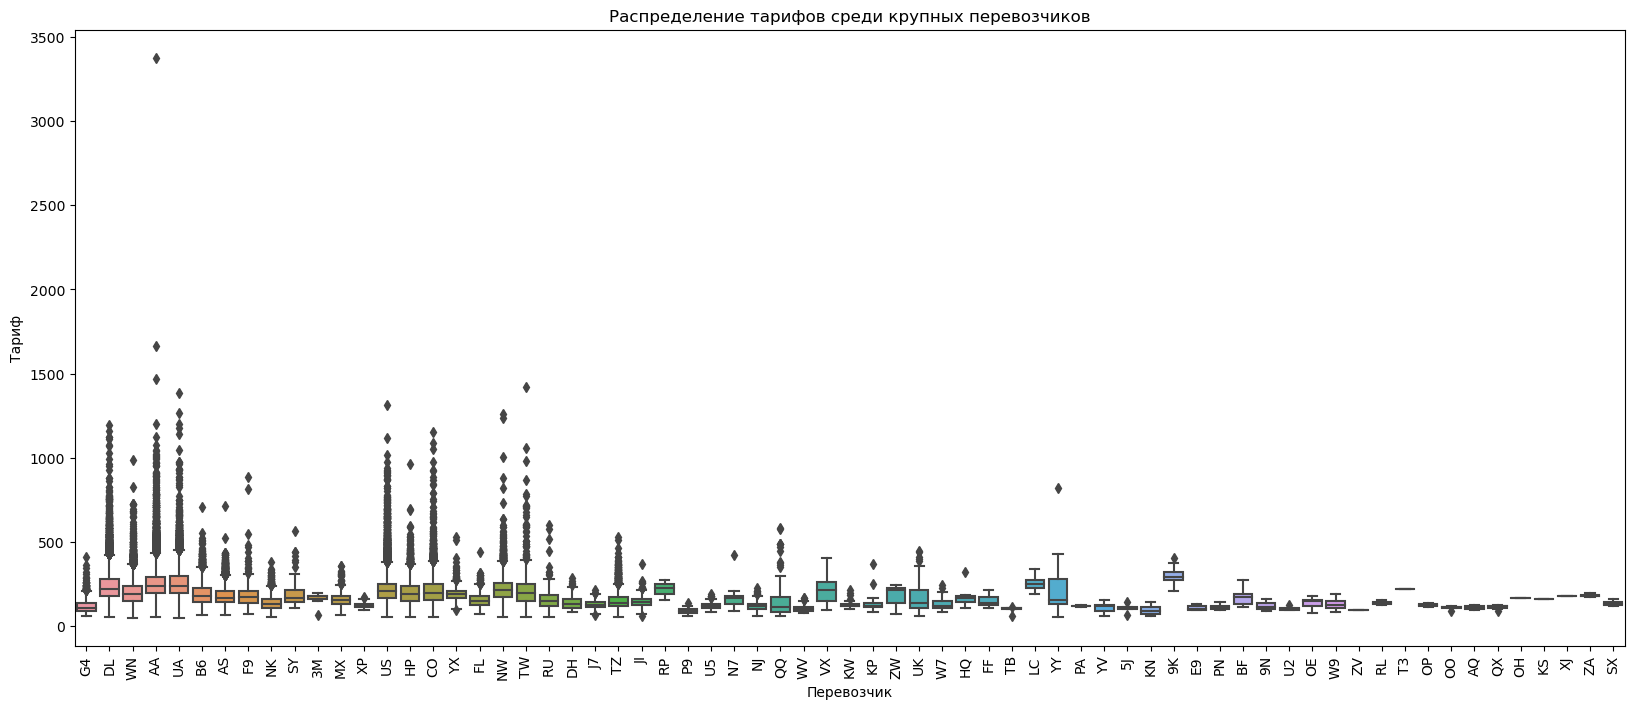

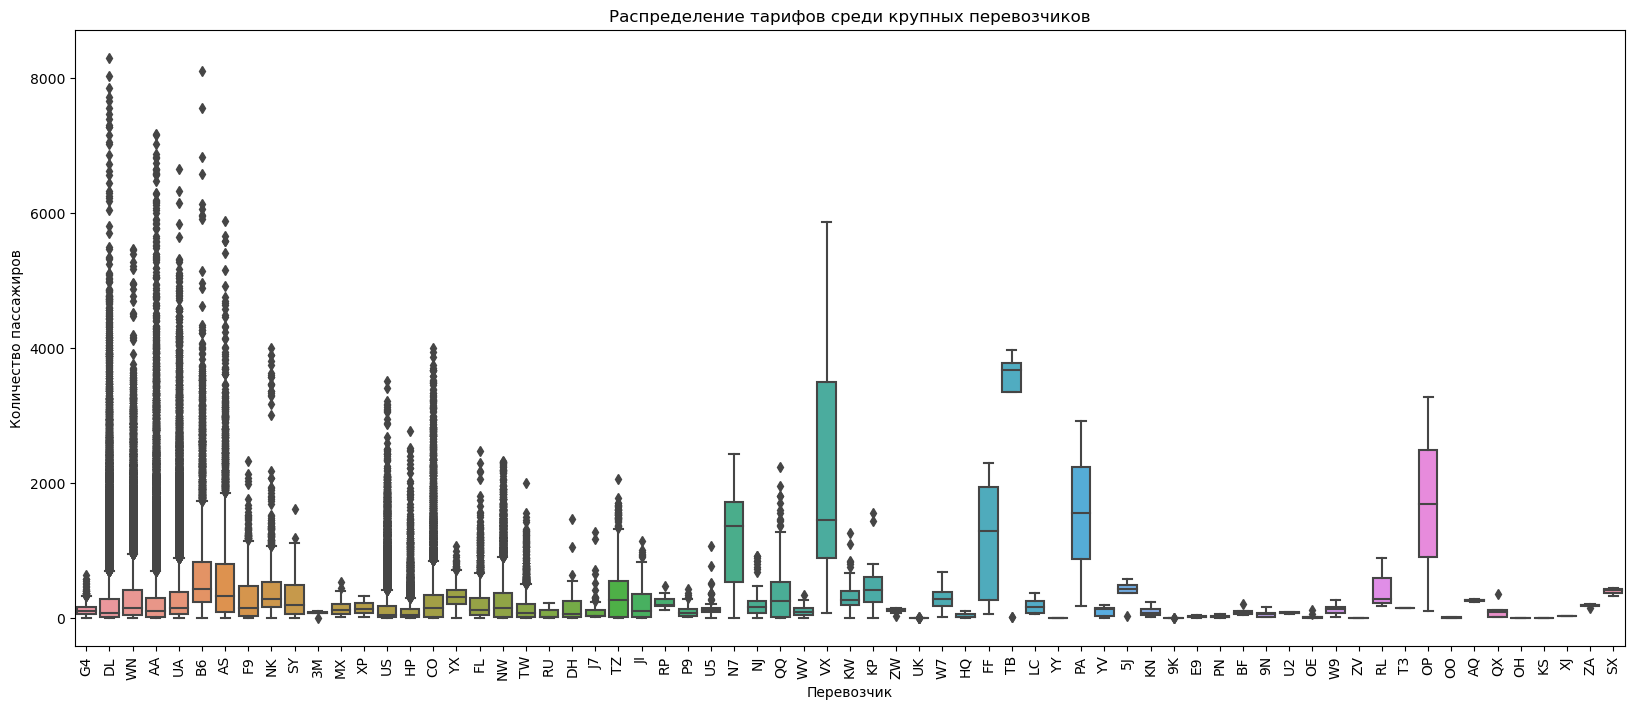

In [53]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='carrier_lg', y='fare', data=df)
plt.title('Распределение тарифов среди крупных перевозчиков')
plt.xlabel('Перевозчик')
plt.ylabel('Тариф')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 8))
sns.boxplot(x='carrier_lg', y='passengers', data=df)
plt.title('Распределение тарифов среди крупных перевозчиков')
plt.xlabel('Перевозчик')
plt.ylabel('Количество пассажиров')
plt.xticks(rotation=90)
plt.show()

**Из какого города (city1) начинается больше всего маршрутов?**

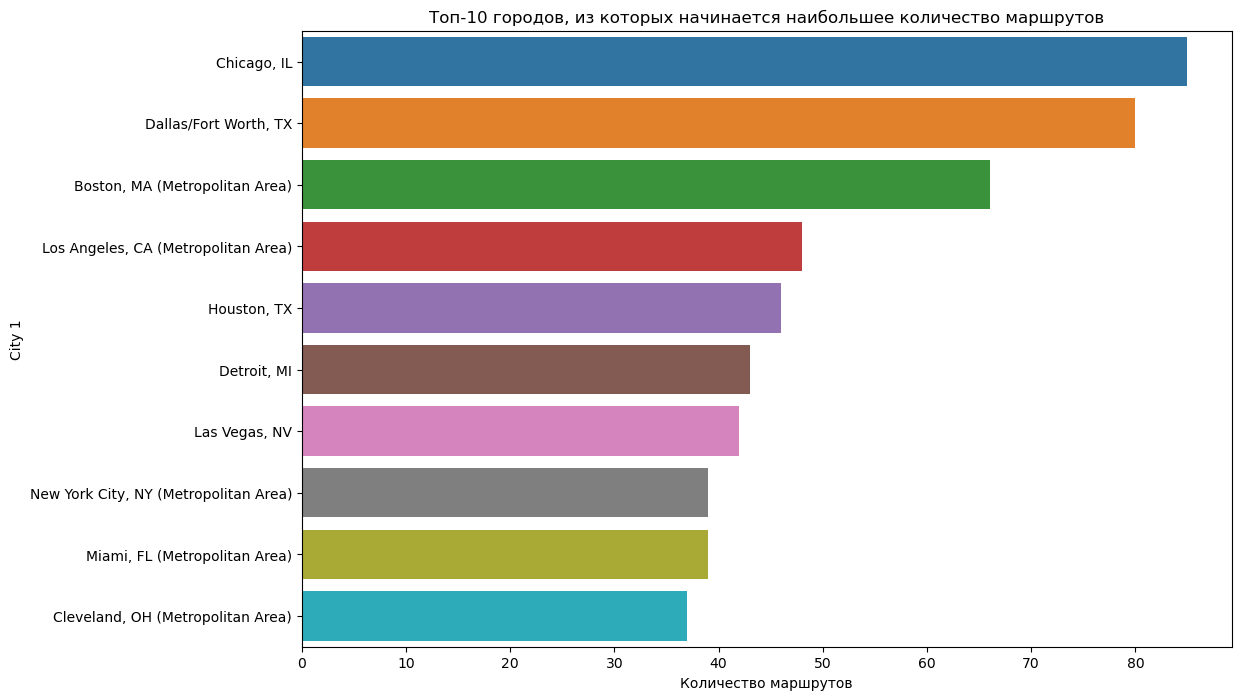

In [54]:
# Подсчет количества уникальных городов city2 для каждого города city1
city_routes = df.groupby('city1')['city2'].nunique().reset_index().sort_values(by='city2', ascending=False)

# Топ-10 городов с наибольшим количеством маршрутов
top_city_routes = city_routes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='city2', y='city1', data=top_city_routes)
plt.title('Топ-10 городов, из которых начинается наибольшее количество маршрутов')
plt.xlabel('Количество маршрутов')
plt.ylabel('City 1')
plt.show()

**Как сравниваются fare_lg и fare_low для одних и тех же маршрутов?**

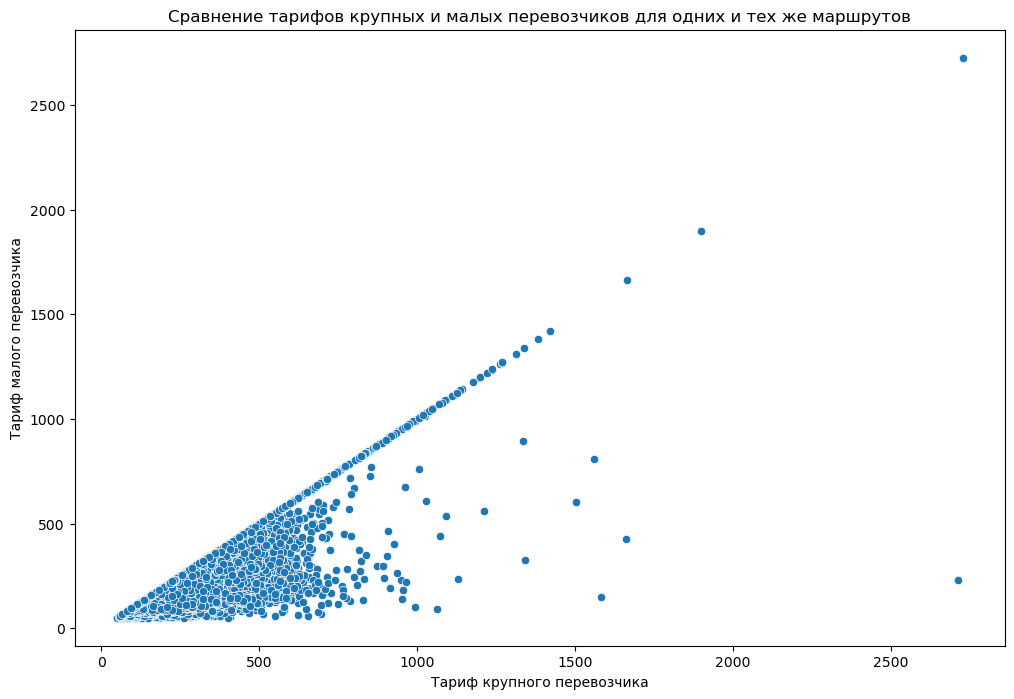

In [55]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='fare_lg', y='fare_low', data=df)
plt.title('Сравнение тарифов крупных и малых перевозчиков для одних и тех же маршрутов')
plt.xlabel('Тариф крупного перевозчика')
plt.ylabel('Тариф малого перевозчика')
plt.show()

**Как изменяется рыночная доля (large_ms против lf_ms) по годам?**

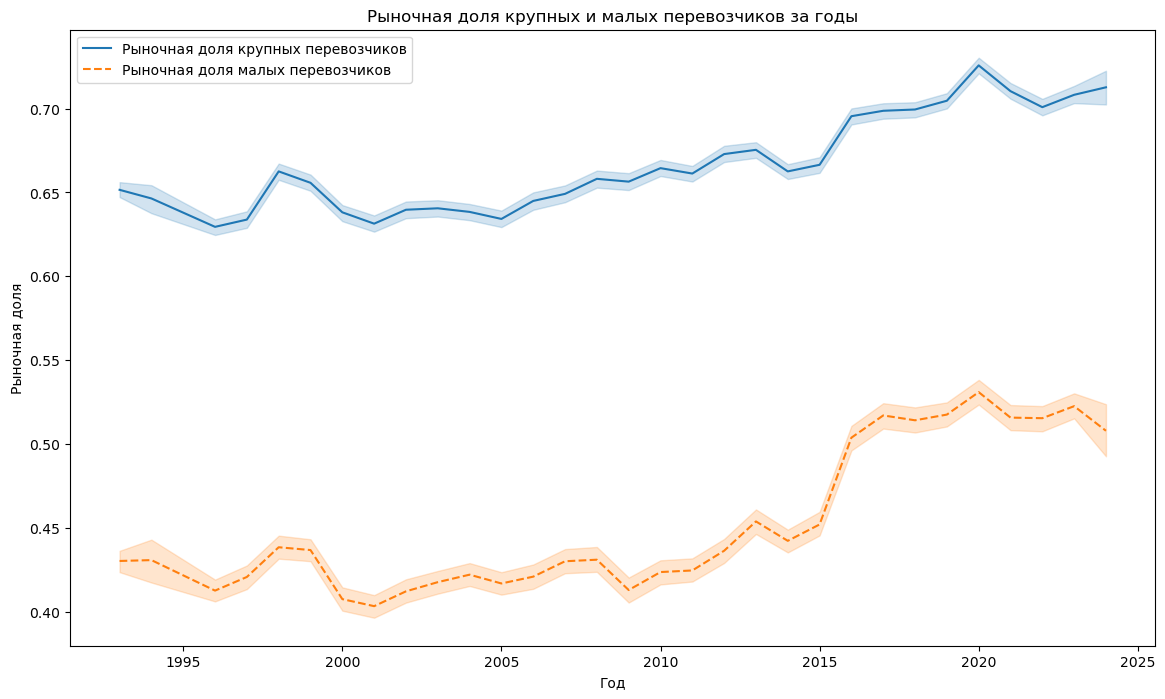

In [56]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='large_ms', data=df, label='Рыночная доля крупных перевозчиков')
sns.lineplot(x='Year', y='lf_ms', data=df, label='Рыночная доля малых перевозчиков', linestyle='--')
plt.title('Рыночная доля крупных и малых перевозчиков за годы')
plt.xlabel('Год')
plt.ylabel('Рыночная доля')
plt.legend()
plt.show()